# Fourier Transformation

Import Libraries

In [1]:
# Import libraries
import sys
import random
import glob
import pickle
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from augmentation_test import read_image
from augmentation_list import AugmentationList
from augmentation import Augmentations

Collect main EUV image and display it

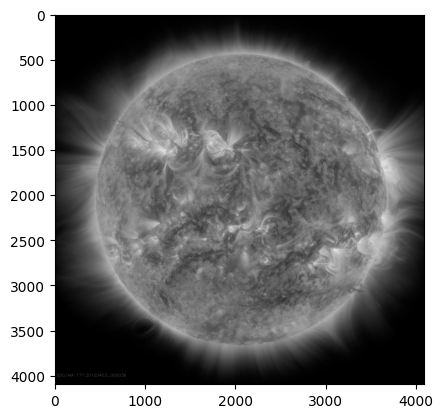

In [2]:
# Read image as normalized grayscale
euv_img = Image.open('./data/euv/fd/20120403_000036_aia.lev1_euv_12s_4k.jpg')
euv_img = np.array(euv_img.convert('L')) / 255

# Print image        
plt.imshow(euv_img, cmap='gray')
plt.show()

Load random EUV pickle splice image and display it

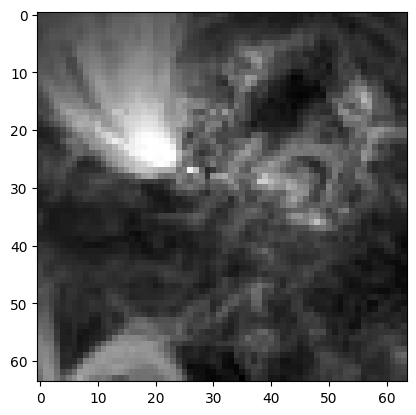

In [3]:
# Collect all pickle files and select a random one
pkl_paths = glob.glob('./../sdo_augmentation/data/euv/tiles/*.p')
pkl_path = random.choice(pkl_paths)

# Read image
pkl_image = pickle.load(imfile := open(pkl_path, 'rb'))
imfile.close()
pkl_image = pkl_image.astype(float) / 255

# Show image
plt.imshow(pkl_image, cmap='gray')
plt.show()

Perform random set of augmentations

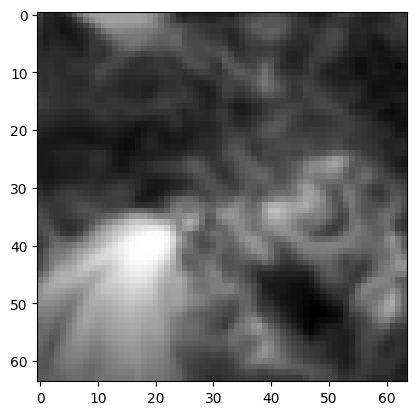

In [4]:
augmentation_list = AugmentationList('euv')
augmentation = Augmentations(pkl_image, augmentation_list.randomize())
augmented_img, title = augmentation.perform_augmentations()

plt.imshow(augmented_img, cmap='gray')
plt.show()


Apply Fast Fourier Transform on EUV image

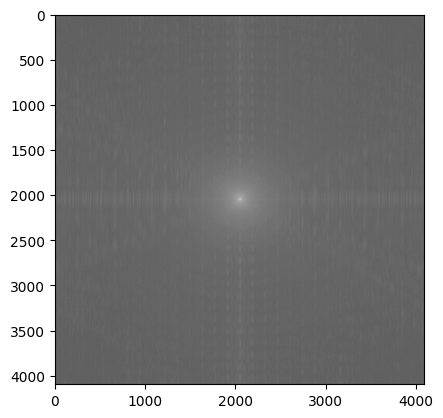

In [5]:
# Create fast fourier space for euv image
feuv_img = np.fft.fftshift(np.fft.fft2(euv_img))
feuv_mgn_spect = 20*np.log(np.abs(feuv_img))

plt.imshow(feuv_mgn_spect, cmap='gray')
plt.show()


Apply Fast Fourier on Augmented Image

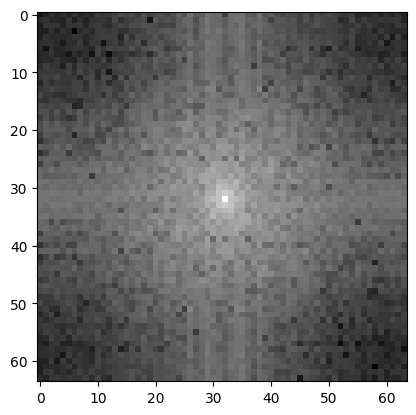

In [6]:
# Fast fourier for augmented image
# Create fast fourier space for euv image
faug_img = np.fft.fftshift(np.fft.fft2(augmented_img))
faug_mgn_spect = 20*np.log(np.abs(faug_img))

plt.imshow(faug_mgn_spect, cmap='gray')
plt.show()


Convert image in fourier space back to normal image

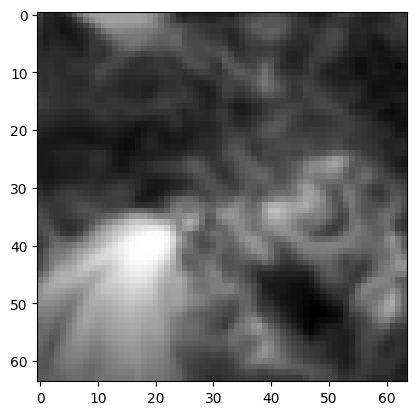

In [9]:
ishift_img = np.fft.ifftshift(faug_img)
ifft_img = np.fft.ifft2(ishift_img)
abs_img = np.abs(ifft_img)
plt.imshow(abs_img, cmap='gray')
plt.show()